# Time Series Analysis Following Box-Jenkins method

**Made By** :
- **Mellouk Mohamed Aness**
- **Groupe 08**

## Project Plan :
1. Data Preparation
1. Exploration
    2. ACF & PACF
    3. ADF Test
1. Stationarity
1. Decomposition
    2. Classical Decomposition
    3. STL Decomposition
1. AR & MA ( Estimation + Validation )
1. ARIMA ( Estimation + Validation + Predicitions )

#### What we are going to do :
we are going to work on Telsa stock market prices from **2022-02-14** to **2024-03-18** ( **Weekly Basis** )

data source : ( Historical data from Yahoo Finance)[https://finance.yahoo.com/quote/TSLA/history]

##### Data Descreption :
- **Open**: This is the price at which a stock started trading when the market opened for the day. It represents the first transaction that occurred when trading commenced.
- **High**: This is the highest price at which the stock traded during the day. It shows the peak price reached during the trading session.
- **Low**: This is the lowest price at which the stock traded during the day. It represents the lowest point the stock reached during the trading session.
- **Close**: This is the price at which the stock ended trading when the market closed for the day. It represents the last transaction that occurred before trading concluded.
- **Adj Close**: This is the adjusted closing price of the stock. It is the closing price adjusted for any corporate actions or other events that may affect the stock price, such as dividends, stock splits, or mergers. The adjusted closing price is often used for calculating returns and analyzing historical performance.
- **Volume**: This represents the total number of shares of the stock that were traded during the day. It indicates the level of activity or liquidity in the stock, with higher volume generally indicating higher interest or trading activity.

### Importing Packages

In [1047]:
import numpy as np # Numerical Calculation
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Plotting
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [977]:
df = pd.read_csv("/home/random/Documents/2_time_series/Data/TSLA_W.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-14,287.190002,308.809998,279.203339,285.660004,285.660004,300017100
1,2022-02-21,278.043335,285.576660,233.333328,269.956665,269.956665,389934900
2,2022-02-28,271.670013,296.626678,271.570007,279.429993,279.429993,377040300
3,2022-03-07,285.433319,288.713318,260.723328,265.116669,265.116669,337762800
4,2022-03-14,260.203339,302.616669,252.013336,301.796661,301.796661,389019300


In [978]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       110 non-null    object 
 1   Open       110 non-null    float64
 2   High       110 non-null    float64
 3   Low        110 non-null    float64
 4   Close      110 non-null    float64
 5   Adj Close  110 non-null    float64
 6   Volume     110 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ KB


In [979]:
# Converting Date Column from Object dtype to datetime
df["Date"] = pd.to_datetime(df["Date"])
print(df.Date.dtype)

datetime64[ns]


In [980]:
# Set the "Date" Column as an index
df.set_index("Date",inplace=True)

In [981]:
# Frequency ( Weekly, Week starts on Monday )
weekly_data = df_close.index
weekly_data = index_data.to_frame().resample("W-MON").mean()
df_close.index = weekly_data.index 

In [982]:
# Describing One Observation
np.round(df.iloc[105],1)

Open               196.1
High               199.4
Low                189.1
Close              192.0
Adj Close          192.0
Volume       379971200.0
Name: 2024-02-19 00:00:00, dtype: float64

**Observation Context**: ( to get a better intuition about the data )

On February 19, 2024, the stock opened at 196.13 Dollar and reached a high of 199.44 Dollar during the trading session. The lowest price the stock reached was 189.13 Dollar. By the end of the trading session, the stock closed at 191.97 Dollar. The adjusted closing price is the same as the closing price, indicating no special adjustments were made. The total number of shares traded that day was 379,971,200 shares.

In [983]:
# We gonna work only with the Close prices ( Univariate Analysis )
df_close = df[["Close"]]

In [129]:
# Simple Moving Average (SMA)
df_sma = df_close.copy()
df_sma["sma_5"] = df_sma["Close"].rolling(window=5, min_periods=1).mean() # Rolling by 5 days
df_sma["sma_10"] = df_sma["Close"].rolling(window=10, min_periods=1).mean() # Rolling by 10 days
df_sma["sma_30"] = df_sma["Close"].rolling(window=30, min_periods=1).mean() # Rolling by 30 days
df_sma["sma_50"] = df_sma["Close"].rolling(window=50, min_periods=1).mean() # Rolling by 50 days

<AxesSubplot:xlabel='Date'>

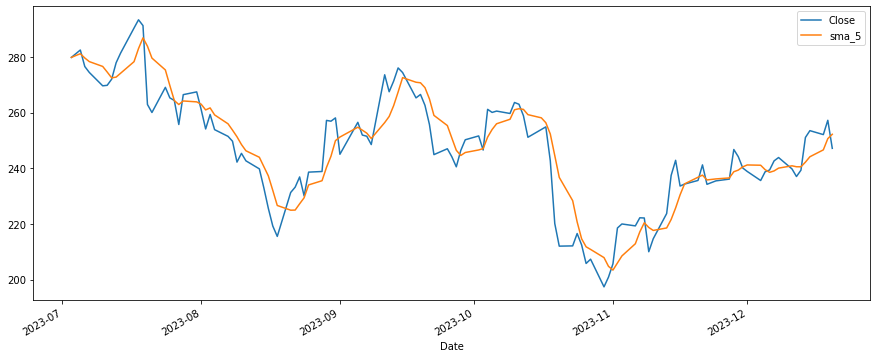

In [130]:
# Simple Moving Average
df_sma[["Close","sma_5"]].plot(figsize=(15,6))

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">1. Time Series Exploration</div></center>

## 1.1 First Graph ( main Graph )

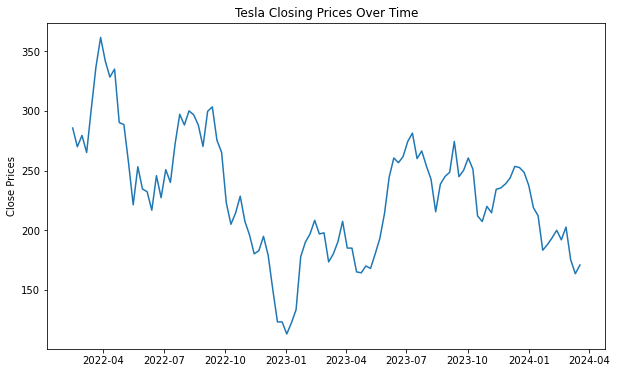

In [984]:
# Visualizing Close Price
plt.figure(figsize=(10,6))
plt.ylabel('Close Prices')
plt.plot(df_close)
plt.title('Tesla Closing Prices Over Time')
plt.show()

## 1.2 Autocorrelation & Partial-Autocorrelation

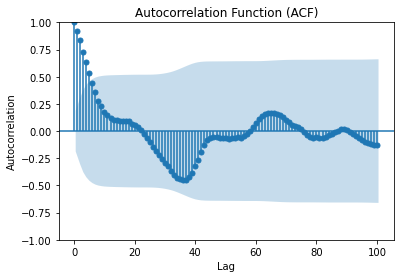

In [1046]:
# Autocorrelation (ACF)
plot_acf(df_close,lags=100)  
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 720x432 with 0 Axes>

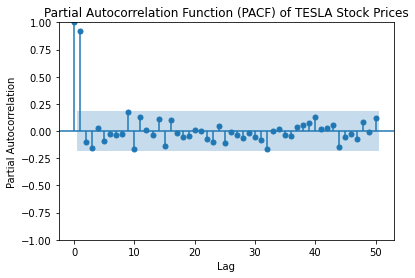

In [1045]:
# Partial autocorrelation (PACF) 
plt.figure(figsize=(10, 6))
plot_pacf(df_close,lags=50)  # Adjust 'lags' to visualize more or fewer lag values
plt.title('Partial Autocorrelation Function (PACF) of TESLA Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

## 1.3 Augmented Dickey-Fuller ( ADF ) test

**Explain Dickey Fuller Test**

In [991]:
result = adfuller(df_close)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9181178381512853
p-value: 0.3235864943709448


In [992]:
# Check if the p-value is less than 0.05
if result[1] < 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")

Fail to reject the null hypothesis: The data is non-stationary.


Since the **p-value > 0.05**, then the data is **Non-Stationary** and contains a unit root

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">2. Stationarity</div></center>

## 2.1 Time Series Decomposition

### 2.1.1 Classic Decomposition

In [995]:
decomposition = seasonal_decompose(df_close, model='additive')

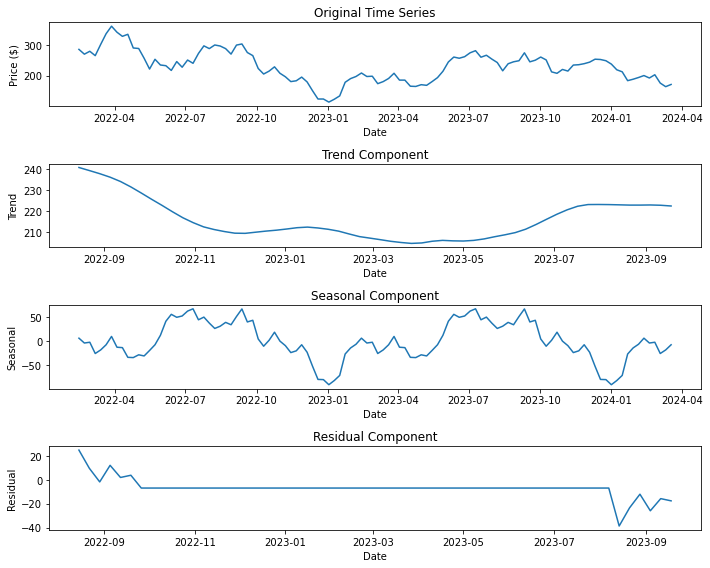

In [996]:
# Plot the decomposition
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df_close)
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

In [1008]:
# Checking for Nan values 
for i,q in zip([decomposition.trend,decomposition.resid,decomposition.seasonal],["Trend","Resid","Seasonal"]) :
    print(f"Number of Nan values {q} : {i.isna().sum()}")
# Why did it show me Nan value

Number of Nan values Trend : 52
Number of Nan values Resid : 0
Number of Nan values Seasonal : 0


In [1009]:
# Série Desaisonnalisé ( cvs )
cvs = decomposition.resid
cvs.dropna(inplace=True)

In [1010]:
# Performing ADF on residual component ( extratcted using Classical Decomposition )
result = adfuller(cvs)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.002100380831346
p-value: 0.2856529154415574


**residual component ( série désaisonnalisé )** have a unit root, therefore it not stationary

### 2.1.2 Seasonal Trend Decomposition ( STL Decomp )

**STL is an additive method**, it uses the additive model

In [1011]:
# STL Decomposition
stl = STL(df_close)
result = stl.fit()

seasonal, trend, resid = result.seasonal, result.trend, result.resid

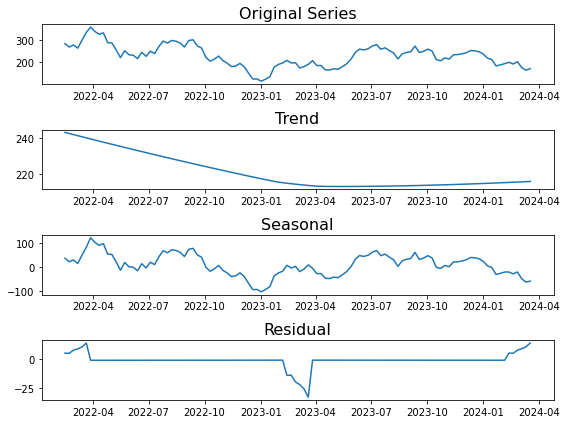

In [1012]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df_close)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

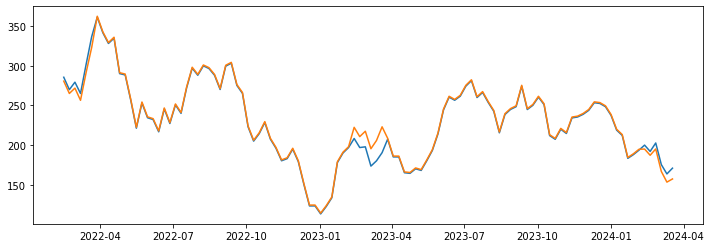

In [1013]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(df_close)
plt.plot(estimated)
plt.show()

In [1014]:
# Checking for Nan values
for i,q in zip([trend,resid,seasonal],["Trend","Resid","Seasonal"]) :
    print(f"Number of Nan values {q} : {i.isna().sum()}")

Number of Nan values Trend : 0
Number of Nan values Resid : 0
Number of Nan values Seasonal : 0


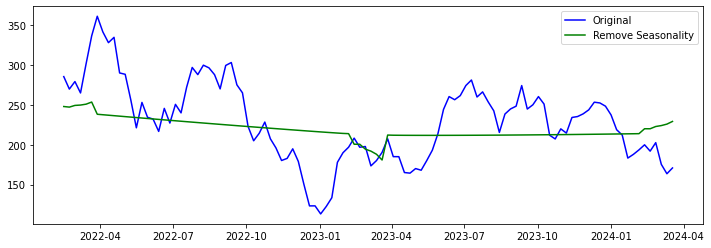

In [1015]:
# Adjusted Seasonality ( Serie Desaisonnalisé )
seasonal_rm = trend + resid
plt.figure(figsize=(12,4))
plt.plot(df_close, color="blue", label="Original")
plt.plot(trend + resid,color="green", label="Remove Seasonality")
# plt.plot(trend + seasonal, color="green", label="R")
plt.legend()
plt.show()

In [1016]:
# Performing ADF on residual component ( extratcted using STL Decomposition )
result = adfuller(resid)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.1228316615368557
p-value: 0.02490903786718921


p-value is less than 5%, which means it have no unit root, therefore it is stationary

## 2.2 Using Differencing Method :

In [1017]:
# differencing
df_diff = df_close["Close"] - df_close["Close"].shift(2)

In [1018]:
df_diff.head()

Date
2022-02-14          NaN
2022-02-21          NaN
2022-02-28    -6.230011
2022-03-07    -4.839996
2022-03-14    22.366668
Name: Close, dtype: float64

In [1019]:
df_diff.dropna(inplace=True)

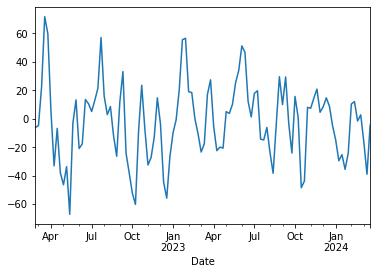

In [1020]:
df_diff.plot()
plt.show()

In [1021]:
# Perform the ADF test

result = adfuller(df_diff)
print('ADF Statistic:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))

ADF Statistic:-3.4213312731703525
p-value:0.010252831267644674


strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it is stationary

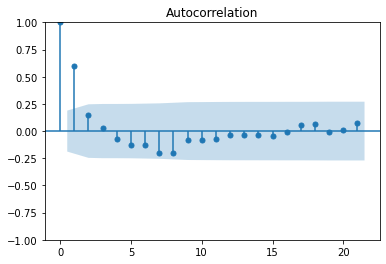

In [1022]:
plot_acf(df_diff)
plt.show()

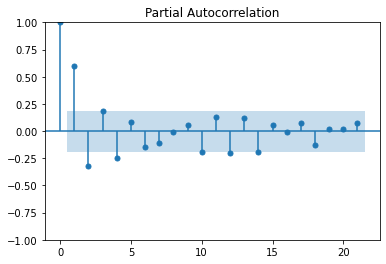

In [1023]:
plot_pacf(df_diff)
plt.show()

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">4. AR & MA Modeling</div></center>

## 3.1 AR Model:

In [1024]:
from statsmodels.tsa.arima.model import ARIMA

model_fit_ar = ARIMA(df_diff, order=(5,0,0)).fit()
model_fit_ar.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-2.0461,3.738,-0.547,0.584,-9.372,5.280
ar.L1,0.9132,0.087,10.453,0.000,0.742,1.084
ar.L2,-0.6259,0.129,-4.848,0.000,-0.879,-0.373
ar.L3,0.4566,0.138,3.302,0.001,0.186,0.728
ar.L4,-0.3396,0.152,-2.239,0.025,-0.637,-0.042
ar.L5,0.0848,0.096,0.879,0.380,-0.104,0.274
sigma2,376.6293,55.708,6.761,0.000,267.443,485.816


- ar.L1 (previous value) has the strongest positive **Direct** influence on the current value.
- ar.L2 to ar.L5 (lags 2-5) also have statistically significant effects

In [1025]:
model_fit_ar.summary().tables[2]

Ljung-Box (L1) (Q):,0.04,Jarque-Bera (JB):,0.17
Prob(Q):,0.84,Prob(JB):,0.92
Heteroskedasticity (H):,0.46,Skew:,0.07
Prob(H) (two-sided):,0.02,Kurtosis:,2.87


- there's no strong evidence to reject normality of the residuals ( p-value (JB test)>0.05)
- p-value(H test )<0.05 : meaning the variance of the residuals might not be constant throughout the data.

## 3.2 MA Model:

In [1029]:
from statsmodels.tsa.arima.model import ARIMA
model_fit_ma = ARIMA(df_diff, order=(0,0,5)).fit()
model_fit_ma.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-2.0680,4.235,-0.488,0.625,-10.367,6.232
ma.L1,1.0640,24.924,0.043,0.966,-47.787,49.915
ma.L2,0.1904,1.596,0.119,0.905,-2.938,3.319
ma.L3,0.1273,3.149,0.040,0.968,-6.046,6.300
ma.L4,-0.0362,0.157,-0.230,0.818,-0.344,0.272
ma.L5,-0.0371,0.912,-0.041,0.968,-1.825,1.751
sigma2,329.1529,8207.317,0.040,0.968,-1.58e+04,1.64e+04


according to the p-values, there no significant MA term

In [1027]:
model_fit_ma.summary().tables[2]

Ljung-Box (L1) (Q):,0.01,Jarque-Bera (JB):,0.29
Prob(Q):,0.92,Prob(JB):,0.87
Heteroskedasticity (H):,0.51,Skew:,0.08
Prob(H) (two-sided):,0.05,Kurtosis:,2.81


## 3.3 Choosing The Optimal Number of Lags

In [1030]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [1031]:
# This function choose the best ARIMA model based on the AIC
model_fit_arima = auto_arima(df_diff, trace=True,suppress_warnings=True)
model_fit_arima.summary().tables[0]

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1022.359, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=977.769, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1020.979, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=968.042, Time=0.71 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=966.256, Time=1.35 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=960.876, Time=1.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=962.147, Time=3.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=959.269, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=964.435, Time=0.48 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=960.450, Time=0.62 sec


Dep. Variable:,y,No. Observations:,108
Model:,"SARIMAX(4, 0, 0)",Log Likelihood,-474.634
Date:,"Wed, 01 May 2024",AIC,959.269
Time:,23:14:49,BIC,972.679
Sample:,02-28-2022,HQIC,964.706
,- 03-18-2024,,
Covariance Type:,opg,,


**So ARIMA(4,0,0) might be the best model**

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">5. ARIMA Modeling</div></center>

In [1034]:
# Estimation : AR(1)+Differencing(2)
model_fit_arima = ARIMA(df_diff, order=(4,2,0)).fit()
model_fit_arima.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.5160,0.097,-5.319,0.000,-0.706,-0.326
ar.L2,-0.8289,0.110,-7.558,0.000,-1.044,-0.614
ar.L3,-0.3018,0.121,-2.486,0.013,-0.540,-0.064
ar.L4,-0.3517,0.092,-3.812,0.000,-0.533,-0.171
sigma2,626.0836,88.408,7.082,0.000,452.807,799.360


- All the autoregressive terms (ar.L1 to ar.L4) have very low p-values. 
- This means that past values of the data (lags 1 to 4) have a significant influence on predicting the current value inn this ARIMA model.

In [1035]:
# Validation
model_fit_arima.summary().tables[2]

Ljung-Box (L1) (Q):,0.58,Jarque-Bera (JB):,0.27
Prob(Q):,0.45,Prob(JB):,0.87
Heteroskedasticity (H):,0.51,Skew:,0.10
Prob(H) (two-sided):,0.05,Kurtosis:,3.15


- **Ljung-Box** test assess independence of the residuals (errors) in the model.
    - according to the **p-value which is greater than 0.05** : **there no dependence between residuals**
- **Jarque-Bera** test assess the normality of the residuals.
    - according to the **p-value>0.05 : the residuals might not deviate significantly from normality.**
- **H test** assesses whether stability of the residuals, if its constant: (homoscedasticity), if it varies: (heteroscedasticity).
    - **p-value<0.05** This indicates a heteroscedasticity, meaning the variance of the residuals might not be constant

In [1041]:
# Predictions using ARIMA(4,2,0)
predicted = model_fit_arima.predict(start=len(df_diff), end=len(df_diff)+ 5, dynamic=False)

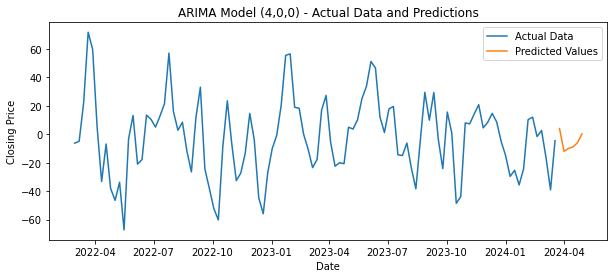

In [1042]:
plt.figure(figsize=(10,4))
plt.plot(df_diff, label="Actual Data")
plt.plot(predicted, label="Predicted Values")

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("ARIMA Model (4,0,0) - Actual Data and Predictions")
plt.legend()
plt.show()

**the predicted values seem to follow the general trend of the main data (blue line) for the next 5 periods.**